In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def f(x) :
    return 3*x**2 - 4*x + 5

In [3]:
f(3)

20

In [4]:
xs = np.arange(-5, 5, 0.25)

In [5]:
xs

array([-5.  , -4.75, -4.5 , -4.25, -4.  , -3.75, -3.5 , -3.25, -3.  ,
       -2.75, -2.5 , -2.25, -2.  , -1.75, -1.5 , -1.25, -1.  , -0.75,
       -0.5 , -0.25,  0.  ,  0.25,  0.5 ,  0.75,  1.  ,  1.25,  1.5 ,
        1.75,  2.  ,  2.25,  2.5 ,  2.75,  3.  ,  3.25,  3.5 ,  3.75,
        4.  ,  4.25,  4.5 ,  4.75])

In [6]:
ys = f(xs) # applying the function the on numpy array
ys

array([100.    ,  91.6875,  83.75  ,  76.1875,  69.    ,  62.1875,
        55.75  ,  49.6875,  44.    ,  38.6875,  33.75  ,  29.1875,
        25.    ,  21.1875,  17.75  ,  14.6875,  12.    ,   9.6875,
         7.75  ,   6.1875,   5.    ,   4.1875,   3.75  ,   3.6875,
         4.    ,   4.6875,   5.75  ,   7.1875,   9.    ,  11.1875,
        13.75  ,  16.6875,  20.    ,  23.6875,  27.75  ,  32.1875,
        37.    ,  42.1875,  47.75  ,  53.6875])

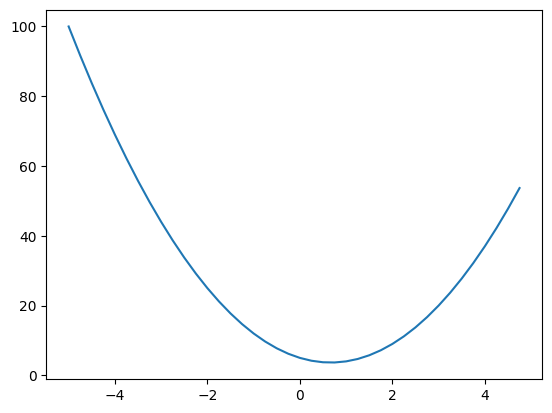

In [7]:
plt.plot(xs,ys)
plt.show()

In [8]:
h = 0.0000000001
x = 2/3
(f(x + h)-f(x))/h # definition of slope limit definition

0.0

In [9]:
a = 2
b = -3
c = 10

d = a*b + c
print(d)

4


In [10]:
h = 0.0001

# inputs (3-D)
a = 2
b = -3
c = 10

d1 = a*b + c
a+= h

d2 = a*b +c 
print(d1,',',d2)
print('slope:',(d2 -d1)/h) # derivative with respect to a 


4 , 3.999699999999999
slope: -3.000000000010772


In [11]:
class Value:

    def __init__(self,data, _children = (), _op = ''): #basically children is use to store the two Value objects on which we perform operation
        self.data = data
        self._prev = set(_children)
        self._op = _op

    def __repr__(self):
        return (f"Value(data={self.data})")

    def __add__(self, other):
        out = Value(self.data + other.data, (self, other), '+') # creating a value object
        return out

    def __mul__(self, other):
        out = Value(self.data * other.data, (self,other), '*')
        return out


In [12]:
a = Value(2)
a

Value(data=2)

In [13]:
b = Value(-3)
b

Value(data=-3)

In [14]:
a + b # here python internally calls a.__add__(b)

Value(data=-1)

In [15]:
a * b

Value(data=-6)

In [16]:
a = Value(3)
b = Value(5)
c = a + b  # Creates a new Value(8) and stores (a, b) in _children

print(c._prev)  # Output: {Value(data=3), Value(data=5)}
print(c._op)

{Value(data=3), Value(data=5)}
+


In [17]:
a = Value(2)
b = Value(-3)
c = Value(10)
d = a*b + c # create a value object d 
d

Value(data=4)

In [18]:
d._prev

{Value(data=-6), Value(data=10)}

In [19]:
d._op

'+'

In [20]:
pip install graphviz

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [21]:
a = Value(2)
b = Value(-3)
c = Value(10)
d = a*b + c # create a value object d 
d

Value(data=4)

In [22]:
from graphviz import Digraph

def trace(root):
    # nodes :A set to store unique Value objects #edges: A set to store relationships (parent → child) between Value objects.
    nodes, edges = set(), set() 
    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                edges.add((child,v))
                build(child)
    build(root)
    return nodes, edges

def draw_dot(root):
    dot = Digraph(format = 'svg' , graph_attr = {'rankdir' : 'LR'})

    nodes, edges = trace(root)
    for n in nodes:
        uid = str(id(n))

        dot.node(name = uid, label = '{ data  %.4f }' % (n.data), shape = 'record')
        if n._op :
            dot.node(name = uid + n._op, label = n._op)
            dot.edge(uid + n._op , uid)

    for n1,n2 in edges:
        dot.edge(str(id(n1)), str(id(n2)) + n2._op)
    return dot

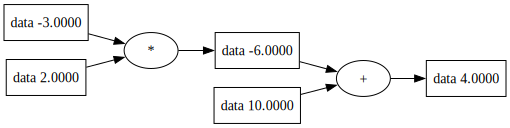

In [23]:
draw_dot(d)

In [24]:
class Value:

    def __init__(self,data, _children = (), _op = '', label = ''): #basically children is use to store the two Value objects on which we perform operation
        self.data = data
        self._prev = set(_children)
        self._op = _op
        self.label = label
        self.grad = 0

    def __repr__(self):
        return (f"Value(data={self.data})")

    def __add__(self, other):
        out = Value(self.data + other.data, (self, other), '+') # creating a value object
        return out

    def __mul__(self, other):
        out = Value(self.data * other.data, (self,other), '*')
        return out

    def tanh(self) :
        n = self.data 
        t = (math.exp(2*n) - 1)/(math.exp(2*n ) + 1)
        out = Value(t , (self,) , 'tanh',label = 'tan h')
        return out

    


In [25]:
a = Value(2 , label = 'a')
b = Value(-3, label ='b')
c = Value(10, label = 'c')
e = a*b ; e.label = 'e'
d = e + c; d.label = 'd' # create a value object d 
f = Value(-2); f.label = 'f'
L = d * f; L.label = 'L'; L.grad = 1

L

Value(data=-8)

In [26]:
from graphviz import Digraph

def trace(root):
    # nodes :A set to store unique Value objects #edges: A set to store relationships (parent → child) between Value objects.
    nodes, edges = set(), set() 
    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                edges.add((child,v))
                build(child)
    build(root)
    return nodes, edges

def draw_dot(root):
    dot = Digraph(format = 'svg' , graph_attr = {'rankdir' : 'LR'})

    nodes, edges = trace(root)
    for n in nodes:
        uid = str(id(n))

        dot.node(name = uid, label = '{%s | data  %.4f | grad %.4f }' % (n.label , n.data, n.grad), shape = 'record')
        if n._op :
            dot.node(name = uid + n._op, label = n._op)
            dot.edge(uid + n._op , uid)

    for n1,n2 in edges:
        dot.edge(str(id(n1)), str(id(n2)) + n2._op)
    return dot

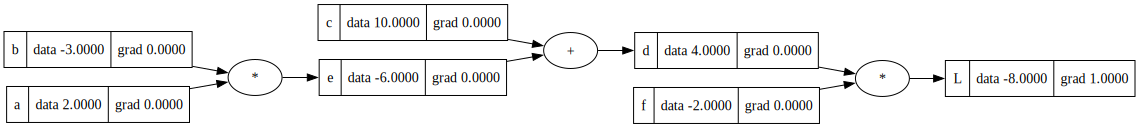

In [27]:
draw_dot(L)

In [28]:
def lol():
    h = 0.001
    a = Value(2 , label = 'a')
    b = Value(-3, label ='b')
    c = Value(10, label = 'c')
    e = a*b ; e.label = 'e'
    d = e + c; d.label = 'd' # create a value object d 
    f = Value(-2); f.label = 'f'
    L = d * f; L.label = 'L'
    L1 = L.data
    
    a = Value(2 + h , label = 'a')
    b = Value(-3, label ='b')
    c = Value(10, label = 'c')
    e = a*b ; e.label = 'e'
    d = e + c; d.label = 'd' # create a value object d 
    f = Value(-2); f.label = 'f'
    L = d * f; L.label = 'L'
    L2 = L.data

    print((L2 -L1)/h)

lol()
    
        

6.000000000000227


In [29]:
# inputs x1 , x2
x1 = Value(2, label = 'x1')
x2 = Value(0, label = 'x2')
# weights of input
w1 = Value(-3, label = 'w1')
w2 = Value(6.7, label = 'w2')
# bias of neuron
b = Value(6.8813735870195432, label = 'b')
x1w1 = x1 * w1; x1w1.label = 'x1w1'
x2w2 = x2 * w2; x2w2.label = 'x2w2'
x1w1x2w2 = x1w1 + x2w2 ; x1w1x2w2.label = 'x1w1 + x2w2'

n = x1w1x2w2 + b; n.label = 'n'
o = n.tanh(); o.label = 'o'


## BACKPROPOGATION

In [30]:
o.grad = 1 # as derivative of o w..r.t o is 1 
n.grad = 1 - o.data**2 # do/dn
x1w1x2w2.grad = n.grad #(do/d(x1w1x2w2) = do/dn * dn/d(x1w1+ x2w2))
b.grad = n.grad
x1w1.grad = x1w1x2w2.grad
x2w2.grad = x1w1x2w2.grad
w1.grad = x1.data * x1w1.grad
x1.grad = w1.data * x1w1.grad
w2.grad = x2.data * x2w2.grad
x2.grad = w2.data * x2w2.grad



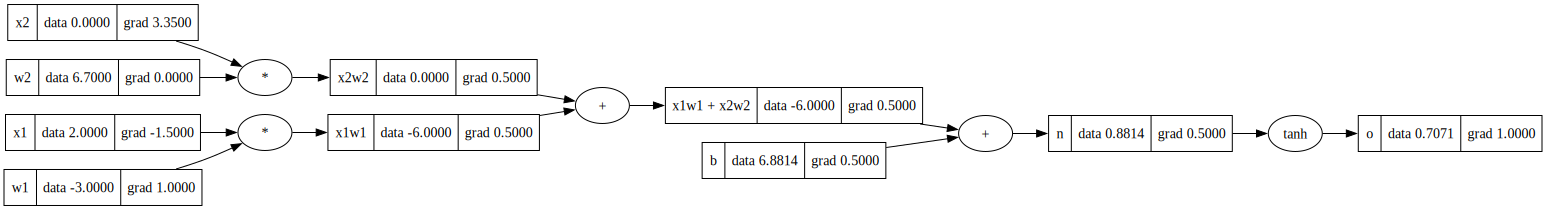

In [31]:
draw_dot(o)

In [32]:
class Value:

    def __init__(self,data, _children = (), _op = '', label = ''): #basically children is use to store the two Value objects on which we perform operation
        self.data = data
        self._prev = set(_children)
        self._op = _op
        self.label = label
        self.grad = 0
        self._backward = lambda : None

    def __repr__(self):
        return (f"Value(data={self.data}")

    

    def __add__(self, other):
        out = Value(self.data + other.data, (self, other), '+') # creating a value object
        

        def _backward():
            self.grad = 1 * out.grad 
            other.grad = 1 * out.grad
        out._backward = _backward
        return out

    def __mul__(self, other):
        out = Value(self.data * other.data, (self,other), '*')
        
        
        def _backward():
            self.grad = other.data * out.grad 
            other.grad = self.data * out.grad
        out._backward = _backward
        return out
    

    def tanh(self) :
        n = self.data 
        t = (math.exp(2*n) - 1)/(math.exp(2*n ) + 1)
        out = Value(t , (self,) , 'tanh',label = 'tan h')
       
        def _backward():
            self.grad = (1 - t**2) * out.grad
        out._backward = _backward
        return out

        topo = []
        visited = set()
        def build_topo(v):
            if v  not in visited :
                visited.add(v)
        for child in v._prev:
           build_topo(child)
        topo.append(v)
    
        build_topo(o)
    



In [33]:
# inputs x1 , x2
x1 = Value(2, label = 'x1')
x2 = Value(0, label = 'x2')
# weights of input
w1 = Value(-3, label = 'w1')
w2 = Value(6.7, label = 'w2')
# bias of neuron

b = Value(6.8813735870195432, label = 'b')
x1w1 = x1 * w1; x1w1.label = 'x1w1'
x2w2 = x2 * w2; x2w2.label = 'x2w2'
x1w1x2w2 = x1w1 + x2w2 ; x1w1x2w2.label = 'x1w1 + x2w2'

n = x1w1x2w2 + b; n.label = 'n'
o = n.tanh(); o.label = 'o'

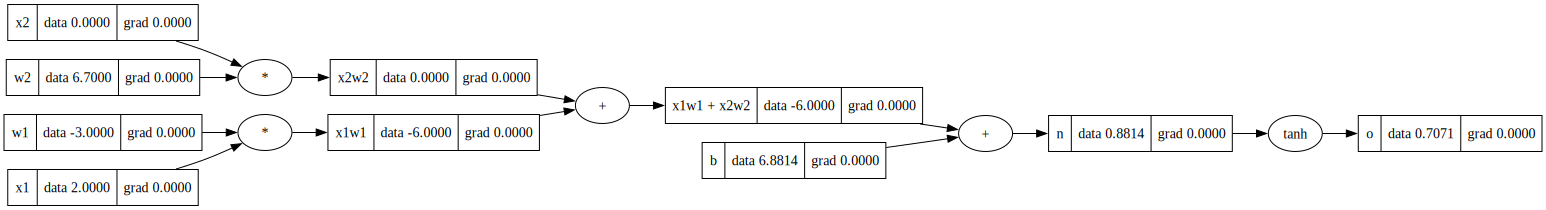

In [34]:
draw_dot(o)

In [35]:
o.grad  =1 


In [36]:
o._backward()

In [37]:
n._backward()

## TOPOLOGICAL SORT

In [38]:
topo = []
visited = set()
def build_topo(v):
    if v  not in visited :
        visited.add(v)
    for child in v._prev:
       build_topo(child)
    topo.append(v)

build_topo(o)
topo


    

[Value(data=0,
 Value(data=6.7,
 Value(data=0.0,
 Value(data=-3,
 Value(data=2,
 Value(data=-6,
 Value(data=-6.0,
 Value(data=6.881373587019543,
 Value(data=0.8813735870195432,
 Value(data=0.7071067811865476]

In [39]:
o.grad = 1
topo = []

visited = set()
def build_topo(v):
    if v  not in visited :
        visited.add(v)
    for child in v._prev:
       build_topo(child)
    topo.append(v)

build_topo(o)

for node in reversed(topo):
    node._backward


In [40]:
class Value:

    def __init__(self,data, _children = (), _op = '', label = ''): #basically children is use to store the two Value objects on which we perform operation
        self.data = data
        self._prev = set(_children)
        self._op = _op
        self.label = label
        self.grad = 0
        self._backward = lambda : None

    def __repr__(self):
        return (f"Value(data={self.data}")

    

    def __add__(self, other):
        other = other if isinstance(other,Value) else Value(other)
        out = Value(self.data + other.data, (self, other), '+') # creating a value object
        

        def _backward():
            self.grad += 1 * out.grad 
            other.grad += 1 * out.grad
        out._backward = _backward
        return out

    def __rmul__(self, other):
        other = other if isinstance(other,Value) else Value(other)
        out = Value(self.data * other.data, (self,other), '*')
        
        
        def _backward():
            self.grad += other.data * out.grad 
            other.grad += self.data * out.grad
        out._backward = _backward
        return out
    

    def tanh(self) :
        n = self.data 
        t = (math.exp(2*n) - 1)/(math.exp(2*n ) + 1)
        out = Value(t , (self,) , 'tanh',label = 'tan h')
       
        def _backward():
            self.grad = (1 - t**2) * out.grad
        out._backward = _backward
        return out

    def backward(self):
        topo = []
        visited = set()
        def build_topo(v):
            if v  not in visited :
                visited.add(v)
            for child in v._prev:
               build_topo(child)
            topo.append(v)
        
        build_topo(self)
        self.grad = 1
        
        for node in reversed(topo):
            node._backward()

        

    


In [41]:
import torch

In [42]:
x1 = torch.Tensor([2]).double()

In [68]:
class Value:
  
  def __init__(self, data, _children=(), _op='', label=''):
    self.data = data
    self.grad = 0.0
    self._backward = lambda: None
    self._prev = set(_children)
    self._op = _op
    self.label = label

  def __repr__(self):
    return f"Value(data={self.data})"
  
  def __add__(self, other):
    other = other if isinstance(other, Value) else Value(other)
    out = Value(self.data + other.data, (self, other), '+')
    
    def _backward():
      self.grad += 1.0 * out.grad
      other.grad += 1.0 * out.grad
    out._backward = _backward
    
    return out

  def __mul__(self, other):
    other = other if isinstance(other, Value) else Value(other)
    out = Value(self.data * other.data, (self, other), '*')
    def _backward():
      self.grad += other.data * out.grad
      other.grad += self.data * out.grad
    out._backward = _backward
      
    return out
  
  def __pow__(self, other):
    assert isinstance(other, (int, float)), "only supporting int/float powers for now"
    out = Value(self.data**other, (self,), f'**{other}')

    def _backward():
        self.grad += other * (self.data ** (other - 1)) * out.grad
    out._backward = _backward

    return out
  
  def __rmul__(self, other): # other * self
    return self * other

  def __truediv__(self, other): # self / other
    return self * other**-1

  def __neg__(self): # -self
    return self * -1
  def __sub__(self, other): # self - other
    return self + (-other)

  def __radd__(self, other): # other + self
    return self + other

  def tanh(self):
    x = self.data
    t = (math.exp(2*x) - 1)/(math.exp(2*x) + 1)
    out = Value(t, (self, ), 'tanh')
    
    def _backward():
      self.grad += (1 - t**2) * out.grad
    out._backward = _backward
    
    return out
  
  def exp(self):
    x = self.data
    out = Value(math.exp(x), (self, ), 'exp')
    
    def _backward():
      self.grad += out.data * out.grad # NOTE: in the video I incorrectly used = instead of +=. Fixed here.
    out._backward = _backward
    
    return out
  
  
  def backward(self):
    
    topo = []
    visited = set()
    def build_topo(v):
      if v not in visited:
        visited.add(v)
        for child in v._prev:
            build_topo(child)
        topo.append(v)
    build_topo(self)

    self.grad = 1.0
    for node in reversed(topo):
      node._backward()


In [69]:
class Neuron:
  
  def __init__(self, nin):
    self.w = [Value(random.uniform(-1,1)) for _ in range(nin)]
    self.b = Value(random.uniform(-1,1))
  
  def __call__(self, x):
    # w * x + b
    act = sum((wi*xi for wi, xi in zip(self.w, x)), self.b)
    out = act.tanh()
    return out
  
  def parameters(self):
    return self.w + [self.b]

class Layer:
  
  def __init__(self, nin, nout):
    self.neurons = [Neuron(nin) for _ in range(nout)]
  
  def __call__(self, x):
    outs = [n(x) for n in self.neurons]
    return outs[0] if len(outs) == 1 else outs
  
  def parameters(self):
    return [p for neuron in self.neurons for p in neuron.parameters()]

class MLP:
  
  def __init__(self, nin, nouts):
    sz = [nin] + nouts
    self.layers = [Layer(sz[i], sz[i+1]) for i in range(len(nouts))]
  
  def __call__(self, x):
    for layer in self.layers:
      x = layer(x)
    return x
  
  def parameters(self):
    return [p for layer in self.layers for p in layer.parameters()]


In [71]:
xs = [ [2 , 3, -1] ,
      [3 , -1 , -5],
      [0.5 , 1.0, 1.0],
      [1 , 1, -1]]
ys = [ 1 , -1 , -1 , 1]
n = MLP(3, [4, 4, 1])
ypred = [n(x) for x in xs]
ypred

[Value(data=0.9038279602715684),
 Value(data=0.7818074302593458),
 Value(data=0.9051698295515688),
 Value(data=0.8708027377582217)]

In [73]:
for k in range(20):
  
  # forward pass
  ypred = [n(x) for x in xs]
  loss = sum((yout - ygt)**2 for ygt, yout in zip(ys, ypred))
  
  # backward pass
  for p in n.parameters():
    p.grad = 0.0
  loss.backward()
  
  # update
  for p in n.parameters():
    p.data += -0.1 * p.grad
  
  print(k, loss.data)
  

0 0.03583775599438804
1 0.03365572691815427
2 0.031710591990783216
3 0.02996655966661474
4 0.028394629373358883
5 0.026971060956269187
6 0.02567624029195748
7 0.02449382576765372
8 0.023410097579883764
9 0.02241345578619023
10 0.02149402895144959
11 0.020643366028527784
12 0.01985419158080512
13 0.019120209701658272
14 0.01843594572568761
15 0.017796617525617214
16 0.01719803015963877
17 0.016636489088493713
18 0.016108728265766793
19 0.015611850220506592
